# PI Calculation with Monte Carlo

* https://arxiv.org/pdf/cond-mat/9612186.pdf

사각형안에 원을 그려놓고 돌을 여러번 던졌을때.. 원안에 들어가는 돌맹이가 있고, 원밖의 사각형안으로 떨어지는 돌맹이도 있을 것입니다.<br>
이를 이용해서 대략적인 PI를 구할수 있습니다. 

#### 정사각형의 넓이

$$ \text{LENGTH}^2 $$

#### 원의 넓이

$$ \text{radius}^2 * \pi = \frac{\text{LENGTH}^2}{4} * \pi $$

#### 원안에 있는지 구하는 공식 

먼저 distance를 구합니다.

$$ d=\sqrt{(x_p-x_c)^2+(y_p-y_c)^2}  $$

만약 distance $ d $ 값이 radius $ r $보다 작으면, point는 원 안에 있다고 할수 있습니다.

#### 원과 사각형의 비율

원과 사각형의 비율을 구하면 다음과 같습니다.

$$ \frac{\pi}{4} $$

즉.. 다음과 같이 PI를 구할수 있습니다.

$$ \frac{\text{원안에 있는 points의 갯수}}{\text{전체 points의 갯수}} * 4 = \pi $$


#### So What?

위의 방식으로 PI를 구하는건 정말 정밀한 측정장비나 또는 복잡한 수학을 사용하지 않고 대충 때려맞출수 있는 방법입니다. 

In [40]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [38]:
data = np.random.rand(50000000, 2)

N = len(data)
LENGTH = 1
CENTER_POINT = (LENGTH/2., LENGTH/2.)

def inside_circle(data):
    center_x, center_y = CENTER_POINT
    x = data[:, 0]
    y = data[:, 1]
    radius = LENGTH/2.
    
    return (x-center_x)**2 + (y-center_y)**2 < radius**2
    
inside_circle_points = inside_circle(data)
n_circle = len(data[inside_circle_points])
PI = (n_circle / N)*4

print(f'True PI:\t{np.pi}')
print(f'Calculated PI:\t{PI}')

True PI:	3.141592653589793
Calculated PI:	3.14195464


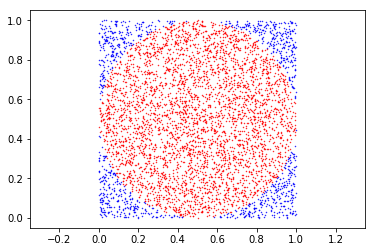

In [67]:
data = np.random.rand(5000, 2)
inside_circle_points = inside_circle(data)

circle_points = data[inside_circle_points]
not_circle_ponits = data[~inside_circle_points]

# Plot
axis('equal')
scatter(circle_points[:, 0], circle_points[:, 1], color='red', s=0.2)
scatter(not_circle_ponits[:, 0], not_circle_ponits[:, 1], color='blue', s=0.2)